In [1]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib widget

done


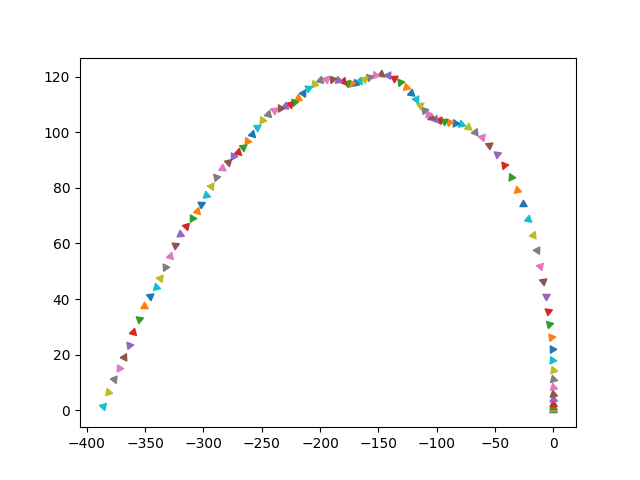

In [42]:
plt.close('all')
state = np.array([
    0, 0, 0, 0, 0, 0
])

forces = np.array([50, 1, 9.8])

A = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
])

m = 1
I = 1

dt = 0.1

state_hist = []

simtime = 10

for i in range(round(simtime/dt)):
    theta = state[4]
    B = np.array([
        [0, 0, 0],
        [-sin(theta)/m, 0, 0],
        [0, 0, 0],
        [cos(theta)/m, 0, -1],
        [0, 0, 0],
        [0, 1/I, 0]
    ])

    state_dot = A @ state + B @ forces
    state = state + state_dot * dt

    state_hist.append(state)

state_hist = np.array(state_hist)

plt.figure()
for x in state_hist:
    plt.scatter(x[0], x[2], marker=(3, 0, np.degrees(x[4])))
print('done')

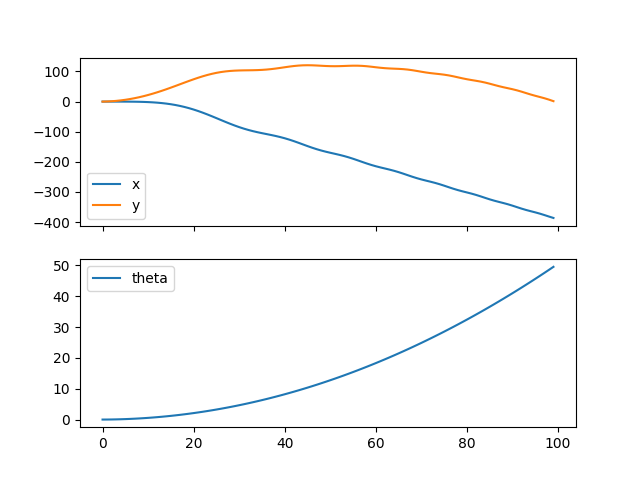

In [43]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(state_hist[:, 0], label='x')
axs[0].plot(state_hist[:, 2], label='y')
axs[1].plot(state_hist[:, 4], label='theta')
for ax in axs:
    ax.legend()